In [ ]:
# !pip install dill

In [1]:
import os
import dill
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.0 MB/s eta 0:00:00


In [26]:
from keras.preprocessing.image import load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/images

/content/drive/MyDrive/images


In [4]:
%ls

fer2013.csv


In [5]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [7]:
label_map = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [8]:
image1 = np.array(df['pixels'].loc[0].split(' ')).reshape(48,48).astype('float')

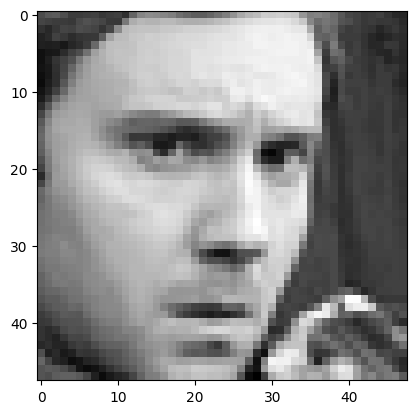

In [9]:
plt.imshow(image1,cmap='gray')

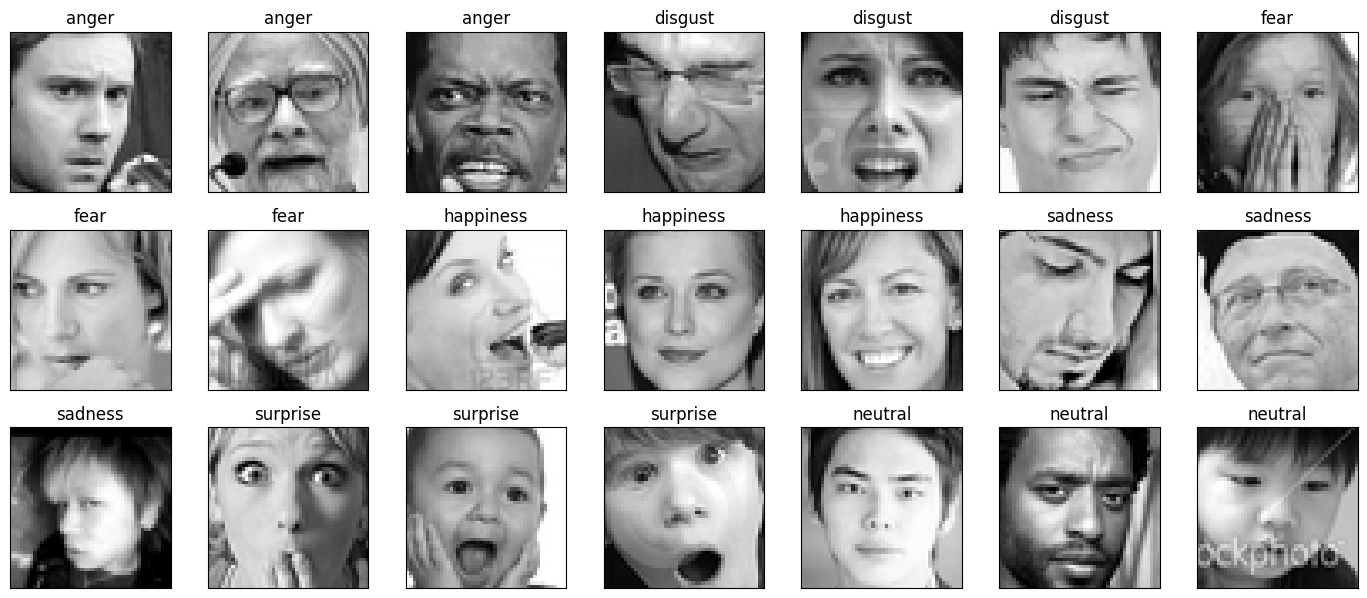

In [10]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px,cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_map[label])
        plt.tight_layout()

In [11]:
array = df['pixels'].apply(lambda x:np.array(x.split(' ')).reshape(48,48,1).astype('float32'))

In [12]:
image_array = np.stack(array,axis=0)

In [13]:
image_array.shape

(35887, 48, 48, 1)

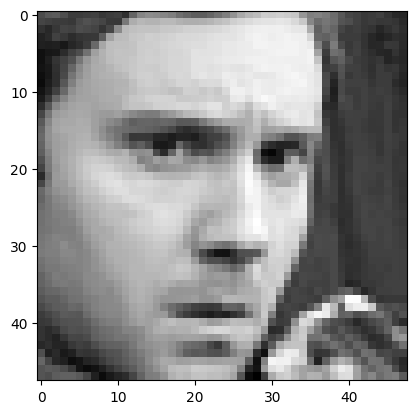

In [14]:
plt.imshow(image_array[0],cmap='gray')

In [15]:
label = df['emotion'].values
label

array([0, 0, 2, ..., 0, 3, 2])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(image_array,label,test_size=0.2,random_state=42)
X_test.shape

(7178, 48, 48, 1)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
model = tf.keras.models.Sequential([    # Layer1
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        # Layer2
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        # Layer3
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        # Layer4
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        # Dense Layer
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')
                                        ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [19]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(x= X_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
225/225 [==============================] - 3s 12ms/step - loss: 1.2595 - accuracy: 0.5258 - val_loss: 1.3045 - val_accuracy: 0.5046
Epoch 2/100
225/225 [==============================] - 2s 11ms/step - loss: 1.2425 - accuracy: 0.5330 - val_loss: 1.3825 - val_accuracy: 0.4734
Epoch 3/100
225/225 [==============================] - 2s 11ms/step - loss: 1.2213 - accuracy: 0.5417 - val_loss: 1.2895 - val_accuracy: 0.5137
Epoch 4/100
225/225 [==============================] - 2s 11ms/step - loss: 1.2046 - accuracy: 0.5510 - val_loss: 1.3725 - val_accuracy: 0.4773
Epoch 5/100
225/225 [==============================] - 3s 13ms/step - loss: 1.1880 - accuracy: 0.5571 - val_loss: 1.4465 - val_accuracy: 0.4532
Epoch 6/100
225/225 [==============================] - 3s 12ms/step - loss: 1.1694 - accuracy: 0.5619 - val_loss: 1.3094 - val_accuracy: 0.5091
Epoch 7/100
225/225 [==============================] - 3s 11ms/step - loss: 1.1513 - accuracy: 0.5723 - val_loss: 1.3074 - val_accuracy:

In [22]:
model_json = model.to_json()
with open("emotion_analysis.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotion_analysis.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from keras.models import model_from_json

In [24]:
json_file = open("emotion_analysis.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotion_analysis.h5")

In [27]:
def funct(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

Original label: neutral
1/1 [==============================] - 0s 17ms/step
Predicted label: fear


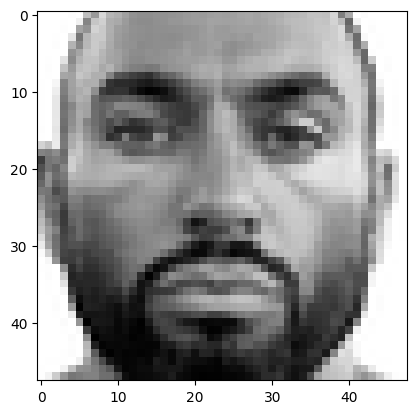

KeyboardInterrupt: ignored

In [29]:
from IPython.display import clear_output
import time
for i in range(40):
    print("Original label: {}".format(label_map[y_test[i]]))
    pred = model.predict(tf.expand_dims(X_test[i],0)).argmax()
    print("Predicted label: {}".format(label_map[pred]))
    plt.imshow(X_test[i].reshape(48,48),cmap='gray')
    plt.show()
    time.sleep(3)
    clear_output(wait=True)